In [1]:
import os
import cv2
import scipy
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from glob import glob

In [2]:
def windowing(img, eps, training=False):
    img = img.copy()
    center = np.mean(img)
    if training:
        width_param = 4.5 + random.random()
    else:
        width_param = 5.
    
    width = np.std(img) * width_param
    low = center - width / 2
    high = center + width / 2
    
    img[img < low] = low
    img[img > high] = high
    
    return img

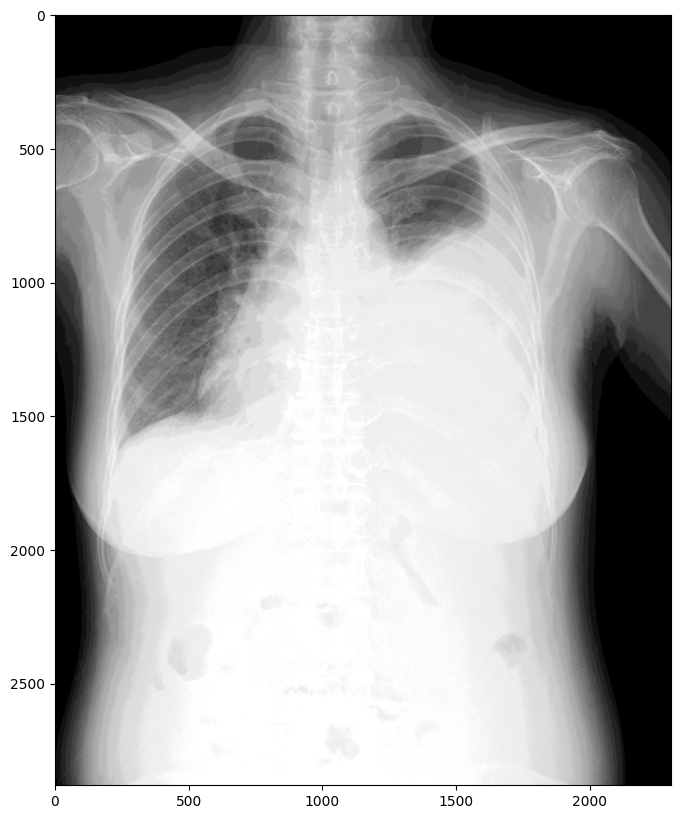

In [3]:
img_path = '/home/minhyekj/data/VinDRCXR/png/0a0ac65c40a9ac441651e4bfbde03c4e.png'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

In [4]:
img_dir = '/home/younjoon/DomainAdaptation/diffusers/examples/dreambooth/generated/PleuralEffusionV2'
for path in sorted(os.listdir(img_dir))[:380]:
    img2 = cv2.imread(os.path.join(img_dir, path), cv2.IMREAD_GRAYSCALE)
    break

(array([1025167.,  136709.,  321420.,  202922.,  529411.,  274952.,
         642933.,  349767.,  714462., 2437777.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

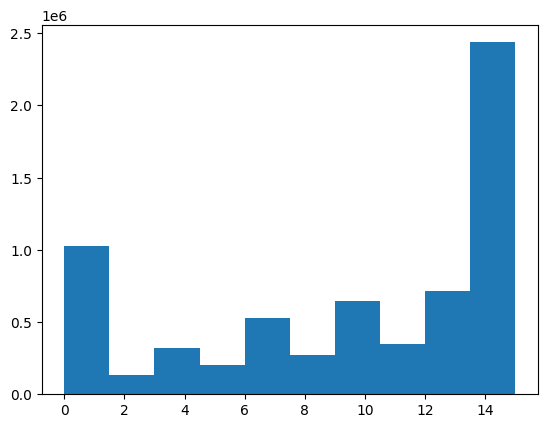

In [16]:
plt.hist(img.flatten(), bins=10)

(array([ 12687.,  14766.,  12217.,  10644.,  14114.,  39195., 111865.,
         34855.,   8613.,   3188.]),
 array([  0. ,  25.4,  50.8,  76.2, 101.6, 127. , 152.4, 177.8, 203.2,
        228.6, 254. ]),
 <BarContainer object of 10 artists>)

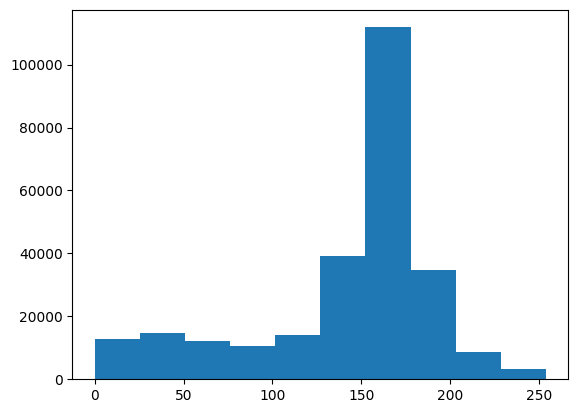

In [17]:
plt.hist(img2.flatten(), bins=10)

In [27]:
npy_paths = glob('/data/minhyekj/VinDRCXR/npy/*.npy')

In [28]:
for npy_path in tqdm(npy_paths[:]):
    img = np.load(npy_path)

    #img = windowing(img, 1e-6)
    img = (img - img.min()) / (img.max() - img.min())
    #img = (img * 255).astype(np.uint8)
    #img /= 255
   
    img *= 255
    file_name = npy_path.split('/')[-1][:-4]
    file_path = os.path.join('/data/minhyekj/VinDRCXR/png/', file_name + '.png')
    
    #if os.path.exists(file_path):
    #    continue
    cv2.imwrite(file_path, img)

  0%|          | 27/15000 [00:02<22:57, 10.87it/s]